In [1]:
import baccoemu
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import scipy
import warnings

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plot_utils
import plotter
import utils
import run_inference as rinf
import moment_network as mn

%load_ext autoreload
%autoreload 2

2024-12-23 22:42:39.398583: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-23 22:42:39.495773: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 22:42:39.495810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 22:42:39.508334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 22:42:39.538130: I tensorflow/core/platform/cpu_feature_guar

In [2]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

### Results

In [3]:
plot_dir = '../plots/plots_2024-12-20'
save_plots = False

data_mode = 'emuPk'
assert data_mode in ['emuPk', 'muchisimocksPk']

idxs_obs = [0]

tag_test = ''
if data_mode == 'emuPk':
    #n_rlzs_per_cosmo = 9
    n_rlzs_per_cosmo = 1
    #tag_emuPk = '_5param'
    #tag_emuPk = '_2param'
    tag_emuPk = '_fixedcosmo_n1000'
    tag_errG = f'_boxsize500'
    
    test_noiseless = True
    tag_datagen = f'{tag_emuPk}{tag_errG}_nrlzs{n_rlzs_per_cosmo}'
    
    theta, Pk, gaussian_error_pk, k, param_names_all, bias_params, random_ints, \
            theta_noiseless, Pk_noiseless, gaussian_error_pk_noiseless = rinf.load_data_emuPk(tag_emuPk, 
                                                    tag_errG, tag_datagen,
                                                    n_rlzs_per_cosmo=n_rlzs_per_cosmo,
                                                    return_noiseless=True)
    print(theta.shape)
    # for fixedcosmo, we decide which parameters to sample over
    if 'fixedcosmo' in tag_emuPk:
        param_names = ['omega_cold', 'sigma8_cold']
        #param_names = ['omega_cold', 'sigma8_cold', 'hubble', 'ns', 'omega_baryon']
        tag_test += f'_{len(param_names)}param'
        theta = np.array([theta[:,param_names_all.index(pn)] for pn in param_names]).T
        theta_test = theta[idxs_obs]

    if test_noiseless:
        y_test = Pk_noiseless[idxs_obs]
        y_err_test = gaussian_error_pk_noiseless[idxs_obs]
        tag_test += '_noiseless'
    else:
        y_test = Pk[idxs_obs]
        y_err_test = gaussian_error_pk[idxs_obs]

fn_emuPk_params ../data/emuPks/emuPks_params_fixedcosmo_n1000.txt
theta_noiseless (1000,)
(1000, 8)


In [4]:
param_labels = [utils.param_label_dict[param_name] for param_name in param_names]

In [5]:
# only need for bounds, TODO save bounds somwehere
dir_emus_lbias = '/home/kstoreyf/external'
emu, emu_bounds, emu_param_names = utils.load_emu(dir_emus_lbias=dir_emus_lbias)
dict_bounds = {name: emu_bounds[emu_param_names.index(name)] for name in param_names}

Loading l-bias lpt emulator...


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using ver

Nonlinear l-bias emulator loaded in memory.


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Results for specific model

In [6]:
# n_train = 8000
# #tag_inf = f'{tag_data}_ntrain{n_train}_diagcov'
# #tag_inf = f'{tag_data}_ntrain{n_train}'
# tag_inf = f'{tag_data}_ntrain{n_train}'
# #tag_inf = f'{tag_data}_ntrain{n_train}_diagcov_scalecovlog'
# #tag_inf = f'{tag_data}_ntrain{n_train}_diagcov_scalecovminmax'
# dir_sbi = f'../results/results_sbi/sbi{tag_inf}'

In [7]:
# inf_methods = ['mn']
# labels_extra = ['']
# #colors = [utils.color_dict_methods[meth] for meth in methods]
# colors = ['#2E3CA2']

# for idx_obs in range(5):
#     theta_obs_true = theta_test[idx_obs]
#     plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
#                             inf_methods, [tag_inf], 
#                             colors=colors, labels_extra=labels_extra)



In [8]:
param_names

['omega_cold', 'sigma8_cold']

In [12]:
theta_obs_true, param_names

(array([0.3175, 0.834 ]), ['omega_cold', 'sigma8_cold'])

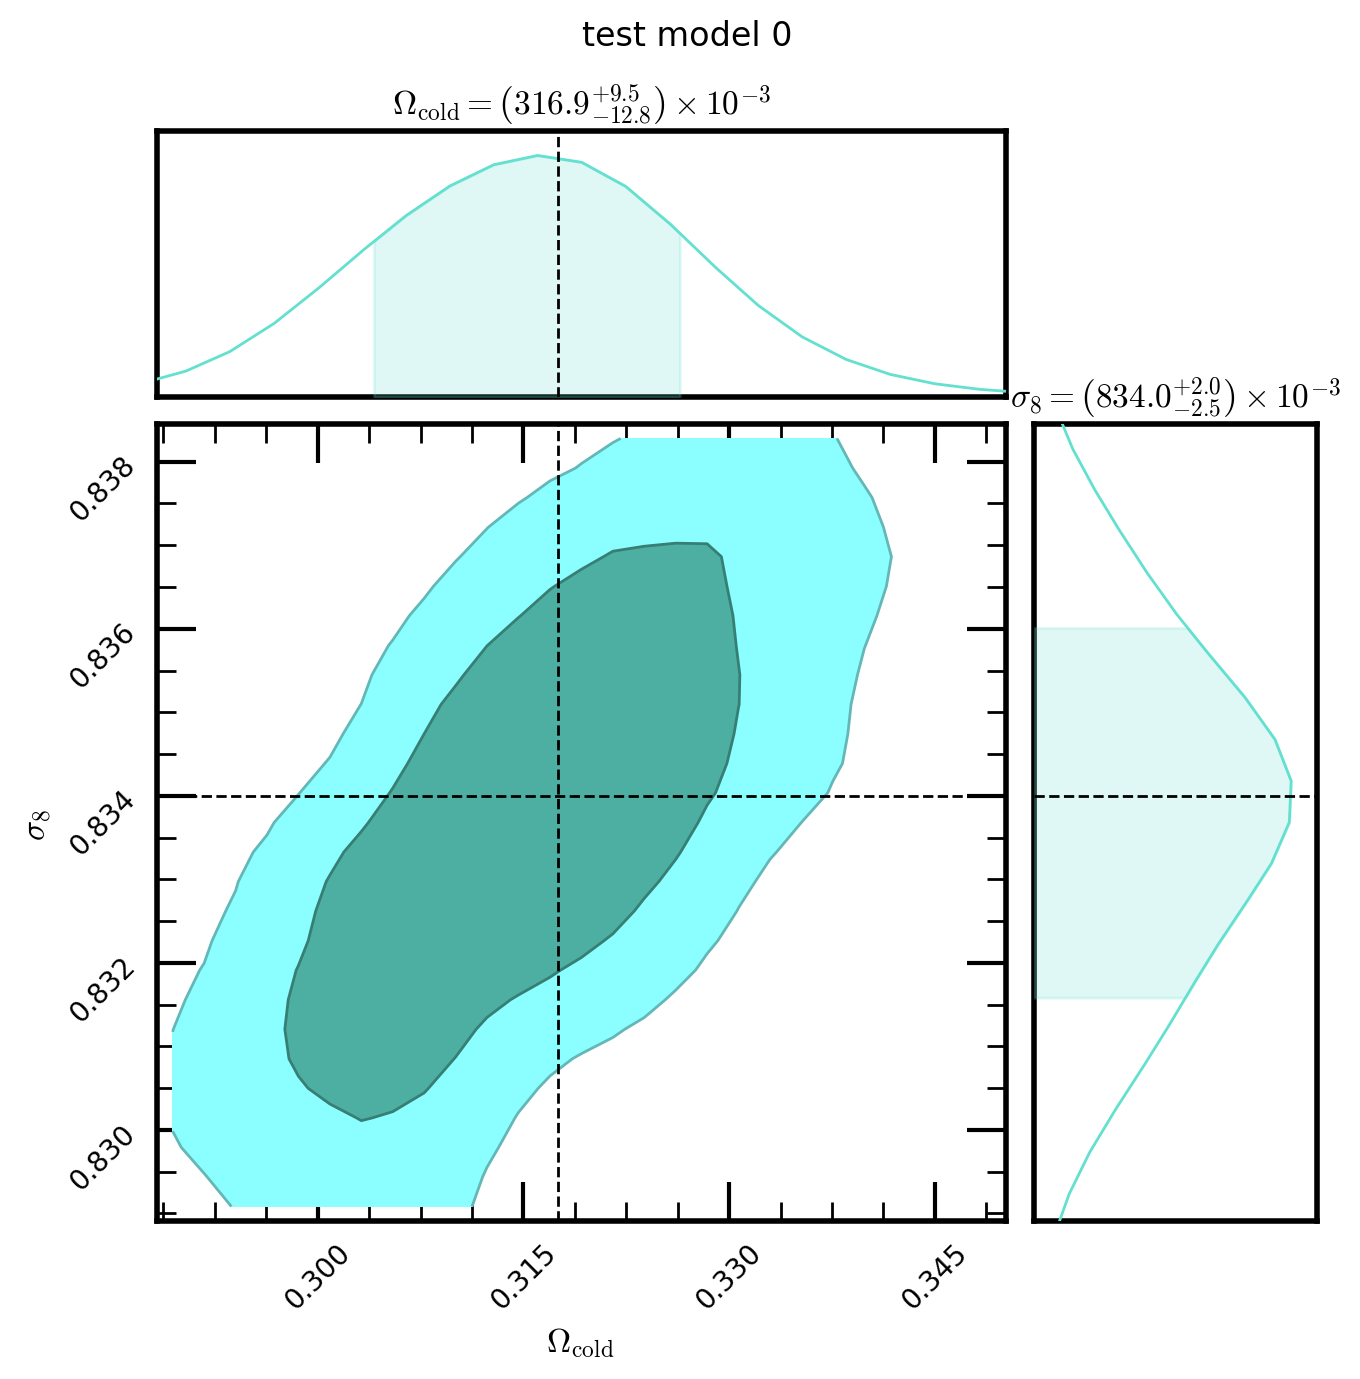

In [13]:
inf_methods = [
               #'mn',
               #'emcee',
               'dynesty']
#tags_inf = [tag_inf]*len(methods)
tags_inf = [
            #'_emuPk_2param_boxsize500_ntrain8500',
            #'_emuPk_2param_boxsize500_nrlzs1',
            #'_emuPk_2param_boxsize500_nrlzs1',
            '_emuPk_fixedcosmo_n1000_boxsize500_nrlzs1_2param_noiseless'
            #'_emuPk_fixedcosmo_n1000_boxsize500_nrlzs1_5param_noiseless'
            ]

labels_extra = [#'(N_train=1000)', '(N_train=3000)', 
                #'(N_train=5000)', '(N_train=8500)', 
                '',
                '']
#colors = [utils.color_dict_methods[meth] for meth in methods]
colors = ['#63E0CF', 'cyan', 'blue', '#2E3CA2']

for idx_obs in [0]:
    theta_obs_true = theta_test[idx_obs]
    #theta_obs_true = theta_test
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods, tags_inf, 
                            colors=colors, labels_extra=labels_extra)

